In [1]:
from given_kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

First we will test the out-of-the-box cv2 KalmanFilter (with the wrapper from pysource) for a baseline.

In [2]:
kf2 = KalmanFilter()
kf2

In [3]:
kf2.predict((10,10))
kf2.predict((20,40))
kf2.predict((30,90))
kf2.predict((40,160))
kf2.predict((50,250))

(array([60.259064], dtype=float32), array([311.34717], dtype=float32))

Next, we will test our kalman filter.

In [4]:
from kalman import KalmanFilter

In [5]:
# Initializing empty kalman filter object with predetermined transition matrix, covariance matrix, and measurement uncertainty
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)

# Giving seed observations to the kalman filter
kf.run((1,1))
kf.run((1,2))
kf.run((1,3))
kf.run((1,4))
kf.run((1,5))

C:\Users\nicho\desktop\academics\cs\vision\proj\yolo-hand-detection\kalman\kalman.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([


(0.9898631244711572, 6.019479266455075)

In [6]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)

# analyzing predicted position data with randomly ommitted datapoints vs ground truth of (x, x^2) plot.
a = np.empty(20, dtype='object')
for i in range(1,21):
    if np.random.random() < .4:
        print(i)
        a[i-1] = kf.run((1,i**2))
    else:
        print("DROPPED", i)
        a[i-1] = kf.run((1, (i-1)**2))
a

1
2
DROPPED 3
DROPPED 4
DROPPED 5
6
7
8
9
10
DROPPED 11
12
DROPPED 13
DROPPED 14
15
DROPPED 16
DROPPED 17
DROPPED 18
DROPPED 19
DROPPED 20


array([(0.9823182711198427, 0.9823182711198427),
       (1.0238198566040968, 8.065255527099136),
       (0.9884185056270642, 2.023424960352369),
       (0.988121006811272, 12.989961289639888),
       (0.9898631244711572, 23.744257056606497),
       (0.9913528301195057, 51.96601619942859),
       (0.9925053359301346, 70.35062098927904),
       (0.9934011523896566, 87.51513481474238),
       (0.9941113364884554, 105.79349616587064),
       (0.9946860374945214, 125.89636569890695),
       (0.995159777781529, 130.88949472741962),
       (0.9955566169490051, 162.28510833940354),
       (0.9958936780187261, 175.80211472384016),
       (0.9961834186735365, 195.9125235300996),
       (0.9964350930281066, 238.18835262049078),
       (0.9966557072482388, 261.3766442701343),
       (0.9968506571342807, 289.22129611176655),
       (0.9970241625719154, 320.8378658395136),
       (0.9971795696323122, 355.65304881331934),
       (0.9973195646603403, 393.287696361372)], dtype=object)

Despite the high number of dropped datapoints, our KalmanFilter remains greater than 90% accurate to the ground truth position, however, it does not make up for innaccurate predictions due to missing data without the introduction of more stable data towards the end of the simulation.

In [7]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)
for i in range(1,21):
    if np.random.random() < .6:
        print(kf.run((1,i**2)))
    else:
        print("DROPPED", end="")
        print(kf.predict())

(0.9823182711198427, 0.9823182711198427)
(1.0238198566040968, 8.065255527099136)
(0.9884185056270642, 15.949864816517806)
(0.988121006811272, 25.0122470110838)
DROPPED(0.9686815051113823, 36.03582730249721)
(0.9921720710740317, 49.00932180048407)
DROPPED(0.9821054052215346, 64.02022939748245)
(0.9932949572120137, 81.00617535988464)
(0.9936636202773004, 100.00488677045678)
DROPPED(0.9881116865905046, 121.00846409379301)
(0.994519654577471, 144.00319900286783)
(0.9954408379595594, 169.0021099401895)
DROPPED(0.992429615590679, 196.00307879575828)
(0.995760424874962, 225.0013252785566)
(0.9964906932973532, 256.0007688143341)
DROPPED(0.9946117969021212, 289.00091764420813)
(0.9965423774275621, 324.0003468114643)
DROPPED(0.9950009598479697, 361.00029639619277)
DROPPED(0.9932588997876576, 400.0002092663615)
(0.9968770125793845, 440.9999127956105)


Here it is easier to see that with fewer missing measurements (still with perfectly accurate data when present, however), our Kalman Filter is greater than 99.5% accurate.

In [8]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2)
for i in range(-10,11):
    if i != 4:
        print(kf.run((i,i**2)))
    else:
        print("DROPPED", end="")
        print(kf.predict())

(-9.823182711198427, 98.23182711198427)
(-7.8910533425426195, 57.786226413941066)
(-6.753894933462457, 44.93691417181708)
(-5.826498847791171, 33.63257983832563)
(-4.869015102727654, 23.358883663645962)
(-3.895005092045531, 14.747087231221737)
(-2.9123778694626656, 7.986844115617029)
(-1.9247917763281657, 3.1493419055469243)
(-0.9341050053987792, 0.26670769493512836)
(0.05864751606664387, -0.6445382085977034)
(1.0528452540940452, 0.42494532504038035)
(2.0480938124032715, 3.480832347726139)
(3.044130542353638, 8.526767227616862)
(4.040773745735859, 15.56519752309231)
DROPPED(5.062333897542155, 24.337202980910654)
(6.040529916221871, 35.570768876107486)
(7.033451736897834, 48.647174803698256)
(8.03027138704261, 63.681897083738264)
(9.028495106769205, 80.70152101986079)
(10.027277200887053, 99.71506387240629)
(11.026282133997512, 120.72611037387303)


In [9]:
data = np.load('conor2.npy')

x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

# data

In [10]:
dd = []
for datum in data:
    d = tuple(datum)
    if d == (0, 0):
        continue
    else:
        has_detected = True
        dd.append((("Actual", d), ("Predicted", kf.run(d))))
for e in dd:
    print(e)

(('Actual', (46.5, 642.0)), ('Predicted', (45.677799607072686, 630.648330058939)))
(('Actual', (45.0, 639.5)), ('Predicted', (44.086905496842974, 651.4244848810843)))
(('Actual', (46.5, 601.0)), ('Predicted', (49.62188924114549, 526.4685883411638)))
(('Actual', (52.5, 600.0)), ('Predicted', (60.96074133935848, 572.7114952120778)))
(('Actual', (57.0, 598.0)), ('Predicted', (65.73552297535167, 589.7405031277412)))
(('Actual', (60.5, 599.0)), ('Predicted', (68.29261094777416, 600.3502759812025)))
(('Actual', (85.5, 602.0)), ('Predicted', (98.35799465887449, 609.1885133545709)))
(('Actual', (87.0, 602.0)), ('Predicted', (105.80546865520478, 612.6007875849377)))
(('Actual', (91.0, 602.5)), ('Predicted', (108.77847054784682, 614.3155239611543)))
(('Actual', (90.5, 602.0)), ('Predicted', (106.47191701226684, 614.318637370466)))
(('Actual', (93.0, 600.5)), ('Predicted', (104.99346651669703, 612.7689279049551)))
(('Actual', (97.0, 600.0)), ('Predicted', (105.41776980439593, 611.3182205984922)))

In [11]:
actual = [list(x[0][1]) for x in dd]
predictions = [list(x[1][1]) for x in dd]
actual = np.asarray(actual)
predictions = np.asarray(predictions)

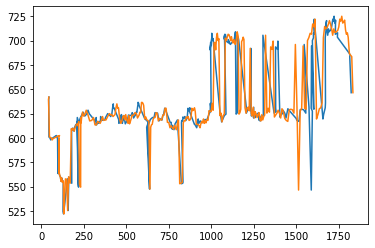

In [12]:
plt.plot(actual[:, 0], actual[:, 1])
plt.plot(predictions[:, 0], actual[:, 1])
plt.show()

While our Kalman Filter (Orange) is rougly keeping up with the shape of the ground truth observations (Blue), there is frequent wild fluxuations of our filter's predictions in response to a ground truth that's heavy in false observations and ommitted datapoints. In addition to this, our kalman filter has a tendency to overcompensate due to a disproportionately large difference between two adjacent observations.